Goal: Build Recommender System
1. Collaborative Filtering Model for cold start problems
2. Content Based

1. EDA & Visualisation
    - Conceptual Modelling
    - Frequency / Most Value count
    - Mising Values
       1. User Features Column
       2. Ingredients Column
              
2. Preprocessing & Visualisation
    - Review column
    - Ingredient column

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('./dataset/skindataall.csv', index_col=[0])
df.head()

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,Price,...,Oily,Sensitive,Category,Product_Url,User_id,Product_id,Ingredients_Cleaned,Review_Cleaned,Good_Stuff,Ing_Tfidf
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['hand', 'best', 'cleanser', 'ever', 'used', '...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2483,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['unfortunately', 'work', 'everyone', 'used', ...",0,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2715,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['favorite', 'cleanser', 'love', 'packaging', ...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['love', 'thing', 'youth', 'people', 'cleanser...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,0,0,Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157,"['sodium', 'cocoyl', 'glutamate', 'cocamidopro...","['trial', 'size', 'wa', 'obsessed', 'skin', 'f...",1,"sodium, cocoyl, glutamate, cocamidopropyl, bet..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8649 entries, 0 to 8702
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Username             8649 non-null   object 
 1   Skin_Tone            8649 non-null   object 
 2   Skin_Type            8649 non-null   object 
 3   Eye_Color            8649 non-null   object 
 4   Hair_Color           8649 non-null   object 
 5   Rating_Stars         8649 non-null   int64  
 6   Review               8649 non-null   object 
 7   Product              8649 non-null   object 
 8   Brand                8649 non-null   object 
 9   Price                8649 non-null   int64  
 10  Rating               8649 non-null   float64
 11  Ingredients          8649 non-null   object 
 12  Combination          8649 non-null   int64  
 13  Dry                  8649 non-null   int64  
 14  Normal               8649 non-null   int64  
 15  Oily                 8649 non-null   i

I downloaded the data from this github repo: https://github.com/agorina91/final_project

#### Some useful notes from OP:

A note on data acquisition and feature engineering: I scraped Sephora.com using selenium webdriver and got two dataframes: user data and product data. They were merged together on unique user id, cleaned, which resulted in a big dataframe with the following columns: 'Username', 'Skin_Tone', 'Skin_Type', 'Eye_Color', 'Hair_Color','Rating_Stars', 'Review', 'Product', 'Brand', 'Price', 'Rating','Ingredients', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive','Category', 'Product_Url', 'User_id', 'Product_id','Ingredients_Cleaned', 'Review_Cleaned', 'Good_Stuff', 'Ing_Tfidf'.

#### My Analysis:
Little informaton was given on how OP ended up with the final data but the data clearly shows each user's review for a product and other features related to the user and product. We could see that preprocessing and cleaning were done for the review and ingredient columns. The 'Good_stuff' column suggests that it correlates with the rating stars. Amongst the user features, for some reason only the Skin_Type data column were hot encoded.

In [4]:
# Descriptive analysis
df.describe(include='all')

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,Price,...,Oily,Sensitive,Category,Product_Url,User_id,Product_id,Ingredients_Cleaned,Review_Cleaned,Good_Stuff,Ing_Tfidf
count,8649,8649,8649,8649,8649,8649.000000,8649,8649,8649,8649.000000,...,8649.000000,8649.000000,8649,8649,8649.000000,8649.000000,8649,8649,8649.000000,8649
unique,6851,10,5,6,7,NaN,7496,315,60,NaN,...,NaN,NaN,4,315,NaN,NaN,299,7495,NaN,299
top,Eye,No data,Combination,Brown,Brunette,NaN,"Love all of the Murad products for acne, has b...",Beauty Elixir,CLINIQUE,NaN,...,NaN,NaN,Cleanser,https://www.sephora.com/product/beauty-elixir-...,NaN,NaN,['info'],"['love', 'murad', 'acne', 'ha', 'skin', 'care'...",NaN,info
freq,27,2102,3567,3529,3182,NaN,5,72,685,NaN,...,NaN,NaN,4117,72,NaN,NaN,210,5,NaN,210
mean,NaN,NaN,NaN,NaN,NaN,4.101861,NaN,NaN,NaN,47.289860,...,0.617644,0.515320,NaN,NaN,3429.434732,155.091224,NaN,NaN,0.619262,NaN
std,NaN,NaN,NaN,NaN,NaN,1.362036,NaN,NaN,NaN,35.774619,...,0.485991,0.499794,NaN,NaN,1987.197060,91.736755,NaN,NaN,0.485596,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,4.000000,...,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,28.000000,...,0.000000,0.000000,NaN,NaN,1696.000000,73.000000,NaN,NaN,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,38.000000,...,1.000000,1.000000,NaN,NaN,3437.000000,155.000000,NaN,NaN,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,58.000000,...,1.000000,1.000000,NaN,NaN,5158.000000,236.000000,NaN,NaN,1.000000,NaN


In [5]:
# Remove columns for my own work
columns = ['Combination', 'Dry', 'Oily', 'Sensitive', 'Normal', 'Ingredients_Cleaned', 
           'Review_Cleaned', 'Good_Stuff', 'Ing_Tfidf']
df_new = df.drop(columns=columns)

In [6]:
#check
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8649 entries, 0 to 8702
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Username      8649 non-null   object 
 1   Skin_Tone     8649 non-null   object 
 2   Skin_Type     8649 non-null   object 
 3   Eye_Color     8649 non-null   object 
 4   Hair_Color    8649 non-null   object 
 5   Rating_Stars  8649 non-null   int64  
 6   Review        8649 non-null   object 
 7   Product       8649 non-null   object 
 8   Brand         8649 non-null   object 
 9   Price         8649 non-null   int64  
 10  Rating        8649 non-null   float64
 11  Ingredients   8649 non-null   object 
 12  Category      8649 non-null   object 
 13  Product_Url   8649 non-null   object 
 14  User_id       8649 non-null   int64  
 15  Product_id    8649 non-null   int64  
dtypes: float64(1), int64(4), object(11)
memory usage: 1.1+ MB


In [7]:
# Convert to csv
df_new.to_csv('./dataset/df_new.csv')

In [8]:
# Rerun descriptive analysis

df_new.describe(include='all')

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,Price,Rating,Ingredients,Category,Product_Url,User_id,Product_id
count,8649,8649,8649,8649,8649,8649.000000,8649,8649,8649,8649.000000,8649.000000,8649,8649,8649,8649.000000,8649.000000
unique,6851,10,5,6,7,NaN,7496,315,60,NaN,NaN,299,4,315,NaN,NaN
top,Eye,No data,Combination,Brown,Brunette,NaN,"Love all of the Murad products for acne, has b...",Beauty Elixir,CLINIQUE,NaN,NaN,No Info,Cleanser,https://www.sephora.com/product/beauty-elixir-...,NaN,NaN
freq,27,2102,3567,3529,3182,NaN,5,72,685,NaN,NaN,210,4117,72,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,4.101861,NaN,NaN,NaN,47.289860,4.290982,NaN,NaN,NaN,3429.434732,155.091224
std,NaN,NaN,NaN,NaN,NaN,1.362036,NaN,NaN,NaN,35.774619,0.470872,NaN,NaN,NaN,1987.197060,91.736755
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,28.000000,4.200000,NaN,NaN,NaN,1696.000000,73.000000
50%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,38.000000,4.400000,NaN,NaN,NaN,3437.000000,155.000000
75%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,58.000000,4.500000,NaN,NaN,NaN,5158.000000,236.000000


In [9]:
# Basic EDA

def basic_eda(df, df_name):
    print(df_name.upper())
    print()
    print(f"Rows: {df.shape[0]} \t Columns: {df.shape[1]}")
    print()
    
    print(f"Total null rows: {df.isnull().sum().sum()}")
    print(f"Percentage null rows: {round(df.isnull().sum().sum() / df.shape[0] * 100, 2)}%")
    print()
    
    print(f"Total duplicate rows: {df[df.duplicated(keep=False)].shape[0]}")
    print(f"Percentage dupe rows: {round(df[df.duplicated(keep=False)].shape[0] / df.shape[0] * 100, 2)}%")
    print()
    
    print(df.dtypes)
    print("-----\n")

In [10]:
basic_eda(df_new, 'sephora dataset')

SEPHORA DATASET

Rows: 8649 	 Columns: 16

Total null rows: 0
Percentage null rows: 0.0%

Total duplicate rows: 2277
Percentage dupe rows: 26.33%

Username         object
Skin_Tone        object
Skin_Type        object
Eye_Color        object
Hair_Color       object
Rating_Stars      int64
Review           object
Product          object
Brand            object
Price             int64
Rating          float64
Ingredients      object
Category         object
Product_Url      object
User_id           int64
Product_id        int64
dtype: object
-----



#### Missing values
The code didn't detect missing values although there are, that's because missing values are filled with a string = no data / no info.

In [11]:
# Missing values for user features: skin tone, skin type, eye color, hair color

print(df_new.value_counts('Skin_Tone', ascending=False))
print('------------------')
print(df_new.value_counts('Skin_Type', ascending=False))
print('------------------')
print(df_new.value_counts('Eye_Color', ascending=False))
print('------------------')
print(df_new.value_counts('Hair_Color', ascending=False))
print('------------------')
print(df_new.value_counts('Ingredients', ascending=False))

Skin_Tone
No data      2102
Light        1888
Fair         1453
Medium       1447
Olive         463
Tan           430
Porcelain     426
Deep          240
Dark          158
Ebony          42
dtype: int64
------------------
Skin_Type
Combination    3567
No data        2106
Dry            1223
Oily            961
Normal          792
dtype: int64
------------------
Eye_Color
Brown      3529
No data    2085
Blue       1263
Hazel       921
Green       803
Gray         48
dtype: int64
------------------
Hair_Color
Brunette    3182
No data     2092
Blonde      1461
Black       1459
Auburn       220
Red          187
Gray          48
dtype: int64
------------------
Ingredients
No Info                                                                                                                                                                                                                                                                                                                             

Values with no data are in top 1 or 2. The numbers are similar.

- Skin Tone 'No data' = 2102
- Skin Type 'No data' = 2106
- Eye Color 'No data' = 2085
- Hair Color 'No data' = 2092

Ingredient columns list shows more interesting data: aside from 'no info' in the top frequency, there are two other values that are not ingredient, 'Visit the Shiseido boutique' & 'Visit the SEPHORA COLLECTION boutique'.

### Dealing with Missing Values

#### 1. User Features missing values

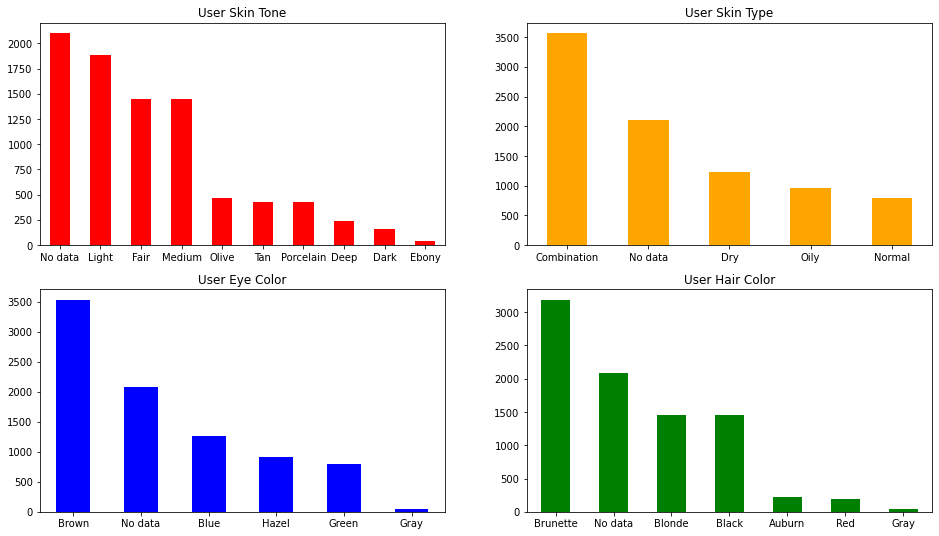

In [12]:
# Before dropping missing values

plt.subplot(221)

df_new['Skin_Tone'].value_counts().plot(kind='bar', title='User Skin Tone', color='red', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(222)

df_new['Skin_Type'].value_counts().plot(kind='bar', color='orange', title='User Skin Type')

plt.xticks(rotation=0)

plt.subplot(223)

df_new['Eye_Color'].value_counts().plot(kind='bar', color='blue', title='User Eye Color')

plt.xticks(rotation=0)

plt.subplot(224)

df_new['Hair_Color'].value_counts().plot(kind='bar', color='green', title='User Hair Color')

plt.xticks(rotation=0)

plt.show()

In [13]:
# Remove highest frequency of missing data
df_drop = df_new[(df_new['Skin_Type'] != 'No data') & 
                 (df_new['Eye_Color'] != 'No data')]

'''After a few trial and error, removing missing data from the two columns is enough to eliminate all the missing data from all of the four columns'''

'After a few trial and error, removing missing data from the two columns is enough to eliminate all the missing data from all of the four columns'

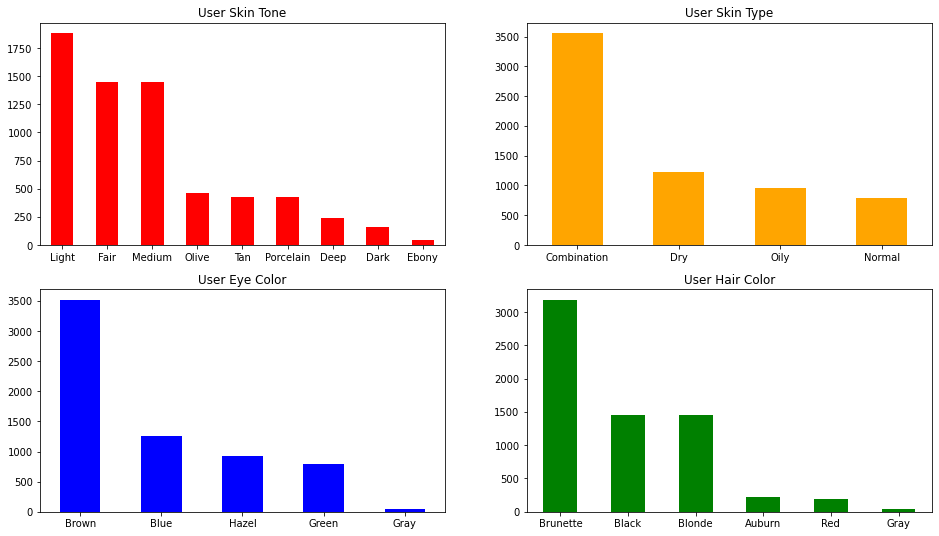

In [14]:
# After dropping missing values

plt.subplot(221)

df_drop['Skin_Tone'].value_counts().plot(kind='bar', title='User Skin Tone', color='red', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(222)

df_drop['Skin_Type'].value_counts().plot(kind='bar', color='orange', title='User Skin Type')

plt.xticks(rotation=0)

plt.subplot(223)

df_drop['Eye_Color'].value_counts().plot(kind='bar', color='blue', title='User Eye Color')

plt.xticks(rotation=0)

plt.subplot(224)

df_drop['Hair_Color'].value_counts().plot(kind='bar', color='green', title='User Hair Color')

plt.xticks(rotation=0)

plt.show()

It worked. Values with no data removed totally.

In [15]:
# Check balance number of rows
basic_eda(df_drop, 'Data after dropping missing values from User Features')

DATA AFTER DROPPING MISSING VALUES FROM USER FEATURES

Rows: 6531 	 Columns: 16

Total null rows: 0
Percentage null rows: 0.0%

Total duplicate rows: 1690
Percentage dupe rows: 25.88%

Username         object
Skin_Tone        object
Skin_Type        object
Eye_Color        object
Hair_Color       object
Rating_Stars      int64
Review           object
Product          object
Brand            object
Price             int64
Rating          float64
Ingredients      object
Category         object
Product_Url      object
User_id           int64
Product_id        int64
dtype: object
-----



From 8649 to 6531 rows

#### 2. Ingredient missing values

In [16]:
# Remove highest frequency of missing data
df_drop1 = df_drop[(df_drop['Ingredients'] != 'No Info') & (df_drop['Ingredients'] != 'Visit the Shiseido boutique') & 
                   (df_drop['Ingredients'] !='Visit the SEPHORA COLLECTION boutique')]

In [17]:
# Check balance number of rows
basic_eda(df_drop1, 'Data after dropping missing values from Ingredients')

DATA AFTER DROPPING MISSING VALUES FROM INGREDIENTS

Rows: 6260 	 Columns: 16

Total null rows: 0
Percentage null rows: 0.0%

Total duplicate rows: 1626
Percentage dupe rows: 25.97%

Username         object
Skin_Tone        object
Skin_Type        object
Eye_Color        object
Hair_Color       object
Rating_Stars      int64
Review           object
Product          object
Brand            object
Price             int64
Rating          float64
Ingredients      object
Category         object
Product_Url      object
User_id           int64
Product_id        int64
dtype: object
-----



From 6531 to 6260 rows

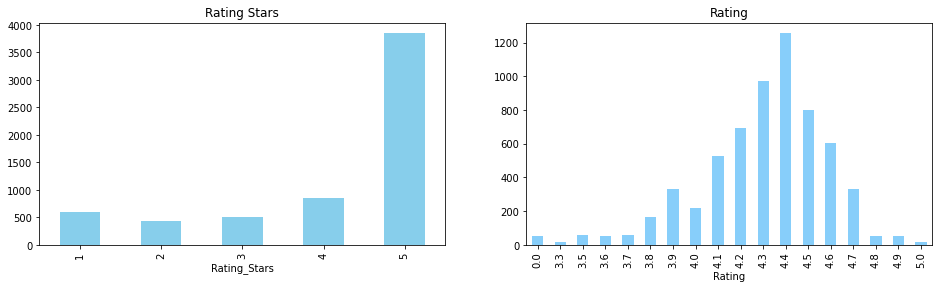

In [18]:
# Understanding the difference between the two rating columns

plt.subplot(221)
plt.title('Rating Stars')
df_drop1.groupby('Rating_Stars')['Product_id'].count().plot.bar(color='skyblue', figsize=(16,9))

plt.subplot(222)
plt.title('Rating')
df_drop1.groupby('Rating')['Product_id'].count().plot.bar(color='lightskyblue', figsize=(16,9));

If we browse the website we will find that 'Rating Stars' column refers to the individual rating of the product whereas the 'Rating' column refers to the average rating of the product.

#### Define the metrics for the model
- For User to User Filtering use the Rating Stars as the metric.
- For Product Ingredient use the Rating column as the metric.

### Outliers
I will not remove any outliers from this data. Although it is understood that during production might slip a tiny percentage resulting in bad ratings and reviews. In that case the fair approach is removing outliers from each and every product one by one. This will take too much time to iterate through 300 unique products as you can see from the code below.


<code>print(df_drop1['Product'].nunique()) </code>
       
300 

To save time, I will take in the outliers.

## 2. Preprocessing 

#### a. Review columns
User reviews is tied to the user features thus will be using Rating Stars column to categorize the product quality based on the reveiw

In [19]:
import nltk
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [20]:
# Create function to assign each rating to a group

def select_rating(df, column, value, new_df):
    new_df = df[df[column] == value]
    print(f'The new DataFrame conists of the value and the value count:')
    print(new_df[column].value_counts()) # check results
    return new_df

#sample calling function:
#rating_t1 = select_rating(df_drop1,'Rating_Stars', 1.0, 'rating_t1')

def join_str(new_str, series, name):
    new_str = " ".join(item for item in series)
    print(f'The String {name} has:')
    print('\n')
    print(new_str) # check results
    return new_str

#sample calling function:
# new_r1 = join_str('new_r1', rating_t1.Review, 'reviews_rt1')

In [21]:
rating_st_1 = select_rating(df_drop1, 'Rating_Stars', 1.0, 'rating_st_1')
rating_st_2 = select_rating(df_drop1, 'Rating_Stars', 2.0, 'rating_st_2')
rating_st_3 = select_rating(df_drop1, 'Rating_Stars', 3.0, 'rating_st_3')
rating_st_4 = select_rating(df_drop1, 'Rating_Stars', 4.0, 'rating_st_4')
rating_st_5 = select_rating(df_drop1, 'Rating_Stars', 5.0, 'rating_st_5')

The new DataFrame conists of the value and the value count:
1    606
Name: Rating_Stars, dtype: int64
The new DataFrame conists of the value and the value count:
2    437
Name: Rating_Stars, dtype: int64
The new DataFrame conists of the value and the value count:
3    515
Name: Rating_Stars, dtype: int64
The new DataFrame conists of the value and the value count:
4    850
Name: Rating_Stars, dtype: int64
The new DataFrame conists of the value and the value count:
5    3852
Name: Rating_Stars, dtype: int64


In [26]:
r1 = join_str('r1', rating_st_1.Review, 'Reviews for Rating Star = 1')
r2 = join_str('r2', rating_st_2.Review, 'Reviews for Rating Star = 2')
r3 = join_str('r3', rating_st_3.Review, 'Reviews for Rating Star = 3')
r4 = join_str('r4', rating_st_4.Review, 'Reviews for Rating Star = 4')
r5 = join_str('r5', rating_st_5.Review, 'Reviews for Rating Star = 5')

The String Reviews for Rating Star = 1 has:


Unfortunately this doesn’t work for everyone. I used it once and woke up the nxt day with 5 pimples, used it again, and again, and again but woke up with more and more. Finally i couldn’t take it anymore, I stopped using it, went back to my cerave hydrating cleanser- and Bam! My skin was clearing up every day after that. I suggest getting the small bottle to try it out first. Remember everyone’s skin is very different.
…read more Been trying this cleanser for about 3 weeks now and it’s not for me. I’m so glad I only bought the small bottle as this product broke me out. It’s the only new product in my routine so I know it is this one causing the break outs. I also just didn’t feel as though it cleanses very well anyway. Just a waste of money tbh. And now I have breakouts around my nose and my chin to deal with... great. Unfortunately this doesn’t work for everyone. I used it once and woke up the nxt day with 5 pimples, used it again, and aga

In [23]:
stopwords = set(STOPWORDS)
stopwords.update(['skin', 'product', 'face'
                ])

In [24]:
def print_wordcloud(data, name):
    print(f'WordCloud for {name}')
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", 
                          collocation_threshold = 50).generate(data)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('\n')

WordCloud for Ratings 1


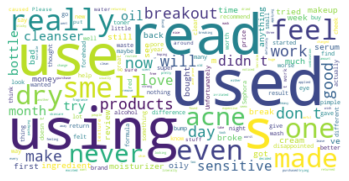



WordCloud for Ratings 2


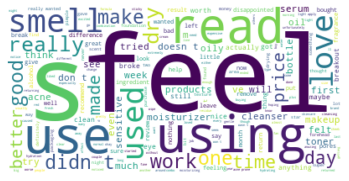



WordCloud for Ratings 3


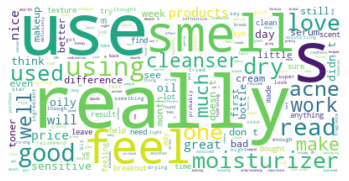



WordCloud for Ratings 4


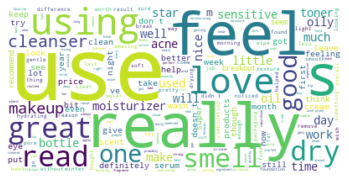



WordCloud for Ratings 5


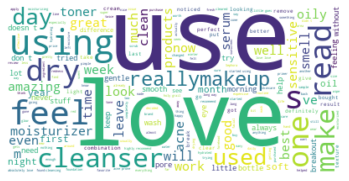

[None, None, None, None, None]

In [27]:
r_list = [
    (r1, 'Ratings 1'),
    (r2, 'Ratings 2'),
    (r3, 'Ratings 3'),
    (r4, 'Ratings 4'),
    (r5, 'Ratings 5')
]

[print_wordcloud(data, name) for data, name in r_list]

It looks beautiful but it didn't give any meaning towards the model

Steps to understand each review ratings better:

    1. Preprocessing
    2. Lemmatize
    3. Remove stopwords, punctuation
    4. TF-IDF

In [28]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [29]:
STOPWORDS = set(stopwords.words('english'))
MIN_WORDS = 1
MAX_WORDS = 1000

PATTERN_S = re.compile(r"'s")  # matches `'s` from text
PATTERN_NOT = re.compile("n't")  # matches `n't` from text
PATTERN_NT = re.compile("nt")  # matches `n't` from text
PATTERN_WILL = re.compile("'ll")  # matches `'ll` from text
PATTERN_ARE = re.compile("re")  # matches `re` from text
PATTERN_URL = re.compile(r"http\S+") # remove url
PATTERN_PUNC = re.compile(r"[^\w\s]") # matches all non 0-9 A-z whitespace


def clean_text(text):
    """
    Series of cleaning. String to lower case, remove non words characters and numbers (punctuation, curly brackets etc).
        text (str): input text
    return (str): modified initial text
    """
    text = text.lower()  # lowercase text
    text = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    
    # replace the matched string with ' '
    text = re.sub(PATTERN_S, ' ', text)
    text = re.sub(PATTERN_NOT, ' not', text)
    text = re.sub(PATTERN_NT, ' not', text)
    text = re.sub(PATTERN_WILL, 'will', text)
    text = re.sub(PATTERN_ARE, ' are', text)
    text = re.sub(PATTERN_URL, ' ', text)
    text = re.sub(PATTERN_PUNC, ' ', text)
    
    return text

def tok_lem(sentence, min_words=MIN_WORDS, max_words=MAX_WORDS, stopwords=STOPWORDS, lemmatize=True):
    """
    Lemmatize, tokenize, crop and remove stop words.
    Args:
      sentence (str)
      min_words (int)
      max_words (int)
      stopwords (set of string)
      lemmatize (boolean)
    returns:
      list of string
    """
    if lemmatize:
        stemmer = WordNetLemmatizer()
        tokens = [stemmer.lemmatize(w) for w in word_tokenize(sentence)]
    else:
        tokens = [w for w in word_tokenize(sentence)]
    token = [w for w in tokens if (len(w) > min_words and len(w) < max_words
                                                        and w not in stopwords)]
    
    return tokens    

def tokenizer(sentence, min_words=MIN_WORDS, max_words=MAX_WORDS):
    """
    Lemmatize, tokenize.
    Args:
      sentence (str)
      min_words (int)
      max_words (int)
    returns:
      list of string
    """
    stemmer = WordNetLemmatizer()
    tokens = [stemmer.lemmatize(w) for w in word_tokenize(sentence)]
    
    return tokens  

def clean_sentences(df, text, column):
    """
    Remove irrelavant characters (in new column clean_sentence).
    Lemmatize, tokenize words into list of words (in new column tok_lem_sentence).
    Args: 
      df (dataframe)
     returns:
      df
    """
    print('Cleaning sentences...')
    df[f'clean_{column}'] = df[text].apply(clean_text)
    df[f'token_{column}'] = df[f'clean_{column}'].apply(
        lambda x: tokenizer(x, min_words=MIN_WORDS, max_words=MAX_WORDS))
    df[f'tok_lem_{column}'] = df[f'clean_{column}'].apply(
        lambda x: tok_lem(x, min_words=MIN_WORDS, max_words=MAX_WORDS, stopwords=STOPWORDS))
    
    print('Cleaning Done !')
    print('----------\n')
    print(df.info())
    return df


In [30]:
clean_sentences(df_drop1, 'Review', 'reviews')

Cleaning sentences...
Cleaning Done !
----------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6260 entries, 0 to 8700
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Username         6260 non-null   object 
 1   Skin_Tone        6260 non-null   object 
 2   Skin_Type        6260 non-null   object 
 3   Eye_Color        6260 non-null   object 
 4   Hair_Color       6260 non-null   object 
 5   Rating_Stars     6260 non-null   int64  
 6   Review           6260 non-null   object 
 7   Product          6260 non-null   object 
 8   Brand            6260 non-null   object 
 9   Price            6260 non-null   int64  
 10  Rating           6260 non-null   float64
 11  Ingredients      6260 non-null   object 
 12  Category         6260 non-null   object 
 13  Product_Url      6260 non-null   object 
 14  User_id          6260 non-null   int64  
 15  Product_id       6260 non-null   int64  
 16  clean_revi

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,Price,Rating,Ingredients,Category,Product_Url,User_id,Product_id,clean_reviews,token_reviews,tok_lem_reviews
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157,this is hands down the best cleanser ive ever ...,"[this, is, hand, down, the, best, cleanser, iv...","[this, is, hand, down, the, best, cleanser, iv..."
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",Cleanser,https://www.sephora.com/product/kale-spinach-g...,2483,157,unfortunately this does not work for everyone ...,"[unfortunately, this, doe, not, work, for, eve...","[unfortunately, this, doe, not, work, for, eve..."
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157,i love all things youth to the people this cle...,"[i, love, all, thing, youth, to, the, people, ...","[i, love, all, thing, youth, to, the, people, ..."
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157,i had a trial size of this and was obsessed my...,"[i, had, a, trial, size, of, this, and, wa, ob...","[i, had, a, trial, size, of, this, and, wa, ob..."
6,britcorm,Porcelain,Oily,Blue,Brunette,1,Been trying this cleanser for about 3 weeks no...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,4.4,"Water, Sodium Cocoyl Glutamate, Cocamidopropyl...",Cleanser,https://www.sephora.com/product/kale-spinach-g...,3776,157,been trying this cleanser for about 3 weeks no...,"[been, trying, this, cleanser, for, about, 3, ...","[been, trying, this, cleanser, for, about, 3, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8696,dalia83,Light,Combination,Green,Blonde,5,I had lunch with a friend who is a plastic sur...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,88,4.4,"Water, DiCaprylyl Carbonate, Niacinamide, Cety...",Moisturizer,https://www.sephora.com/product/ferulic-retino...,4056,124,i had lunch with a friend who is a plastic sur...,"[i, had, lunch, with, a, friend, who, is, a, p...","[i, had, lunch, with, a, friend, who, is, a, p..."
8697,rebeccaelizabe,Porcelain,Oily,Blue,Auburn,5,I've been using this for about a week now (wit...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,88,4.4,"Water, DiCaprylyl Carbonate, Niacinamide, Cety...",Moisturizer,https://www.sephora.com/product/ferulic-retino...,6111,124,ive been using this for about a week now with ...,"[ive, been, using, this, for, about, a, week, ...","[ive, been, using, this, for, about, a, week, ..."
8698,Tinkfairy,Fair,Combination,Hazel,Brunette,5,I was looking for a overnight serum with retin...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,88,4.4,"Water, DiCaprylyl Carbonate, Niacinamide, Cety...",Moisturizer,https://www.sephora.com/product/ferulic-retino...,3127,124,i was looking for a overnight serum with aret...,"[i, wa, looking, for, a, overnight, serum, wit...","[i, wa, looking, for, a, overnight, serum, wit..."
8699,baeyonce,Light,Combination,Blue,Blonde,5,I have never experienced such fast results in ...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,88,4.4,"Water, DiCaprylyl Carbonate, Niacinamide, Cety...",Moisturizer

#### b. Ingredients columns
Ingredient is related to the product itself hence 'Rating' column shall be use to recommend the preference.

In [31]:
# Jump straight to the cleaning process
clean_sentences(df_drop1, 'Ingredients', 'ingredients')

Cleaning sentences...
Cleaning Done !
----------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6260 entries, 0 to 8700
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Username             6260 non-null   object 
 1   Skin_Tone            6260 non-null   object 
 2   Skin_Type            6260 non-null   object 
 3   Eye_Color            6260 non-null   object 
 4   Hair_Color           6260 non-null   object 
 5   Rating_Stars         6260 non-null   int64  
 6   Review               6260 non-null   object 
 7   Product              6260 non-null   object 
 8   Brand                6260 non-null   object 
 9   Price                6260 non-null   int64  
 10  Rating               6260 non-null   float64
 11  Ingredients          6260 non-null   object 
 12  Category             6260 non-null   object 
 13  Product_Url          6260 non-null   object 
 14  User_id              6260 non-null   i

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product,Brand,Price,...,Category,Product_Url,User_id,Product_id,clean_reviews,token_reviews,tok_lem_reviews,clean_ingredients,token_ingredients,tok_lem_ingredients
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3420,157,this is hands down the best cleanser ive ever ...,"[this, is, hand, down, the, best, cleanser, iv...","[this, is, hand, down, the, best, cleanser, iv...",water sodium cocoyl glutamate cocamidopropyl b...,"[water, sodium, cocoyl, glutamate, cocamidopro...","[water, sodium, cocoyl, glutamate, cocamidopro..."
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,Cleanser,https://www.sephora.com/product/kale-spinach-g...,2483,157,unfortunately this does not work for everyone ...,"[unfortunately, this, doe, not, work, for, eve...","[unfortunately, this, doe, not, work, for, eve...",water sodium cocoyl glutamate cocamidopropyl b...,"[water, sodium, cocoyl, glutamate, cocamidopro...","[water, sodium, cocoyl, glutamate, cocamidopro..."
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,Cleanser,https://www.sephora.com/product/kale-spinach-g...,4497,157,i love all things youth to the people this cle...,"[i, love, all, thing, youth, to, the, people, ...","[i, love, all, thing, youth, to, the, people, ...",water sodium cocoyl glutamate cocamidopropyl b...,"[water, sodium, cocoyl, glutamate, cocamidopro...","[water, sodium, cocoyl, glutamate, cocamidopro..."
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,Cleanser,https://www.sephora.com/product/kale-spinach-g...,5017,157,i had a trial size of this and was obsessed my...,"[i, had, a, trial, size, of, this, and, wa, ob...","[i, had, a, trial, size, of, this, and, wa, ob...",water sodium cocoyl glutamate cocamidopropyl b...,"[water, sodium, cocoyl, glutamate, cocamidopro...","[water, sodium, cocoyl, glutamate, cocamidopro..."
6,britcorm,Porcelain,Oily,Blue,Brunette,1,Been trying this cleanser for about 3 weeks no...,Superfood Antioxidant Cleanser,YOUTH TO THE PEOPLE,36,...,Cleanser,https://www.sephora.com/product/kale-spinach-g...,3776,157,been trying this cleanser for about 3 weeks no...,"[been, trying, this, cleanser, for, about, 3, ...","[been, trying, this, cleanser, for, about, 3, ...",water sodium cocoyl glutamate cocamidopropyl b...,"[water, sodium, cocoyl, glutamate, cocamidopro...","[water, sodium, cocoyl, glutamate, cocamidopro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8696,dalia83,Light,Combination,Green,Blonde,5,I had lunch with a friend who is a plastic sur...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,88,...,Moisturizer,https://www.sephora.com/product/ferulic-retino...,4056,124,i had lunch with a friend who is a plastic sur...,"[i, had, lunch, with, a, friend, who, is, a, p...","[i, had, lunch, with, a, friend, who, is, a, p...",water dicaprylyl carbonate niacinamide cetyl a...,"[water, dicaprylyl, carbonate, niacinamide, ce...","[water, dicaprylyl, carbonate, niacinamide, ce..."
8697,rebeccaelizabe,Porcelain,Oily,Blue,Auburn,5,I've been using this for about a week now (wit...,Ferulic + Retinol Wrinkle Recovery Overnight S...,DR. DENNIS GROSS SKINCARE,88,...,Moisturizer,https://www.sephora.com/product/ferulic-retino...,6111,124,ive been using this for about a week now with ...,"[ive, been, using, this, for, about, a, week, ...","[ive, been, using, this, for, about, a, week, ...",water dicaprylyl carbonate niacinamide cetyl a...,"[water, dicaprylyl, carbonate, niacinami

### Resources:

1. [EDA step by step guide](https://www.analyticsvidhya.com/blog/2021/05/exploratory-data-analysis-eda-a-step-by-step-guide/)
2. [Why are outliers important?](https://towardsdatascience.com/outlier-why-is-it-important-af58adbefecc)